<a href="https://www.kaggle.com/code/vrajbhavsar/dog-cat-image-classification?scriptVersionId=119867745" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Importing Dependencies

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import pathlib
import os

## Understand the data

In [2]:
# How many directories and images are there?

for dir_name, dir_path, files in os.walk('/kaggle/input/cat-and-dog'):
  print(f'There is {len(dir_path)} directories and {len(files)} images in {dir_name}')

There is 2 directories and 0 images in /kaggle/input/cat-and-dog
There is 1 directories and 0 images in /kaggle/input/cat-and-dog/test_set
There is 2 directories and 0 images in /kaggle/input/cat-and-dog/test_set/test_set
There is 0 directories and 1013 images in /kaggle/input/cat-and-dog/test_set/test_set/dogs
There is 0 directories and 1012 images in /kaggle/input/cat-and-dog/test_set/test_set/cats
There is 1 directories and 0 images in /kaggle/input/cat-and-dog/training_set
There is 2 directories and 0 images in /kaggle/input/cat-and-dog/training_set/training_set
There is 0 directories and 4006 images in /kaggle/input/cat-and-dog/training_set/training_set/dogs
There is 0 directories and 4001 images in /kaggle/input/cat-and-dog/training_set/training_set/cats


In [3]:
# What are the classes?
data_dir= pathlib.Path('/kaggle/input/cat-and-dog/training_set/training_set')
classes= np.array(sorted([item.name for item in data_dir.glob('*')]))
classes

array(['cats', 'dogs'], dtype='<U4')

## Visualize the data

In [4]:
# Visualizing randim images:

import random
def random_img(target_dir,target_class):
  target_folder= target_dir + target_class
  image = random.sample(os.listdir(target_folder),1)
  print(image)
  img= mpimg.imread(target_folder + '/' + image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis(False);
  print(f'image_shape{img.shape}')
  return img

['cat.2636.jpg']
image_shape(399, 339, 3)


array([[[ 18,  23,  17],
        [ 18,  23,  17],
        [ 18,  23,  17],
        ...,
        [ 31,  37,  25],
        [ 31,  37,  25],
        [ 31,  37,  25]],

       [[ 18,  23,  17],
        [ 18,  23,  17],
        [ 18,  23,  17],
        ...,
        [ 31,  37,  25],
        [ 31,  37,  25],
        [ 31,  37,  25]],

       [[ 18,  23,  17],
        [ 18,  23,  17],
        [ 18,  23,  17],
        ...,
        [ 32,  38,  26],
        [ 32,  38,  26],
        [ 32,  38,  26]],

       ...,

       [[149, 128,  83],
        [157, 136,  91],
        [167, 146, 101],
        ...,
        [127, 109,  71],
        [128, 110,  72],
        [129, 111,  73]],

       [[139, 118,  73],
        [142, 121,  76],
        [147, 126,  81],
        ...,
        [116, 101,  62],
        [116, 101,  62],
        [118, 103,  64]],

       [[176, 155, 110],
        [175, 154, 109],
        [173, 152, 107],
        ...,
        [121, 107,  70],
        [122, 108,  71],
        [123, 109,  72]]

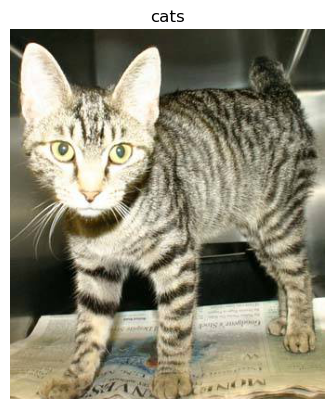

In [5]:
random_img(target_dir='/kaggle/input/cat-and-dog/training_set/training_set/',target_class= 'cats')

## Data Augmentation

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen_aug = ImageDataGenerator(rescale=1.0/255,
                                       rotation_range= 0.2,
                                       shear_range= 0.1,
                                       horizontal_flip= True)

test_datagen= ImageDataGenerator(rescale= 1.0/255)

In [7]:
train_dir= '/kaggle/input/cat-and-dog/training_set/training_set'
test_dir= '/kaggle/input/cat-and-dog/test_set/test_set'

train_data_aug = train_datagen_aug.flow_from_directory(train_dir,
                                                       batch_size= 32,
                                                       target_size= (224,224),
                                                       class_mode= 'binary')

test_data= test_datagen.flow_from_directory(test_dir,
                                                       batch_size= 32,
                                                       target_size= (224,224),
                                                       class_mode= 'binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


## Building a Classifier

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

In [9]:
model= Sequential([
    Conv2D(12, 3, activation= 'relu', input_shape= (224,224,3)),
    # Conv2D(24, 3, padding= 'valid',activation= 'relu'),
    MaxPooling2D(),
    Conv2D(24, 3, padding= 'valid',activation= 'relu'),
    # Conv2D(64, 3, padding= 'valid',activation= 'relu'),
    MaxPooling2D(),
    Conv2D(84, 3, padding= 'valid',activation= 'relu'),
    # Conv2D(112, 3, padding= 'valid',activation= 'relu'),
    MaxPooling2D(),
    Conv2D(110, 3, padding= 'valid',activation= 'relu'),
    # Conv2D(264, 3, padding= 'valid',activation= 'relu'),
    MaxPooling2D(),
     Conv2D(124, 3, padding= 'valid',activation= 'relu'),
    # Conv2D(312, 3, padding= 'valid',activation= 'relu'),
    MaxPooling2D(),
    Conv2D(144, 3, padding= 'same',activation= 'relu'),
    Conv2D(84, 3, padding= 'valid',activation= 'relu'),
    Flatten(),
    Dense(1, activation= 'sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 12)      336       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 12)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 24)      2616      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 24)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 84)        18228     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 84)       0

## Model Compilation

In [10]:
model.compile(loss= 'binary_crossentropy', 
              optimizer= Adam(lr=0.0001), 
              metrics= ['accuracy'])

/opt/conda/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


##  Model Training

In [11]:
training= model.fit_generator(train_data_aug,
                              steps_per_epoch= len(train_data_aug),
                              epochs= 12,
                              verbose= 1,
                              validation_data= test_data,
                              validation_steps= len(test_data))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/12
251/251 [==============================] - 157s 591ms/step - loss: 0.6720 - accuracy: 0.5620 - val_loss: 0.6496 - val_accuracy: 0.6144
Epoch 2/12
251/251 [==============================] - 116s 463ms/step - loss: 0.6141 - accuracy: 0.6563 - val_loss: 0.6018 - val_accuracy: 0.6688
Epoch 3/12
251/251 [==============================] - 117s 465ms/step - loss: 0.5583 - accuracy: 0.7118 - val_loss: 0.5524 - val_accuracy: 0.7168
Epoch 4/12
251/251 [==============================] - 119s 475ms/step - loss: 0.5303 - accuracy: 0.7288 - val_loss: 0.5467 - val_accuracy: 0.7227
Epoch 5/12
251/251 [==============================] - 114s 452ms/step - loss: 0.5047 - accuracy: 0.7522 - val_loss: 0.4911 - val_accuracy: 0.7667
Epoch 6/12
251/251 [==============================] - 115s 459ms/step - loss: 0.4844 - accuracy: 0.7631 - val_loss: 0.4698 - val_accuracy: 0.7726
Epoch 7/12
251/251 [==============================] - 115s 459ms/step - loss: 0.4599 - accuracy: 0.7774 - val_loss: 0.4565 -

## Model Evaluation

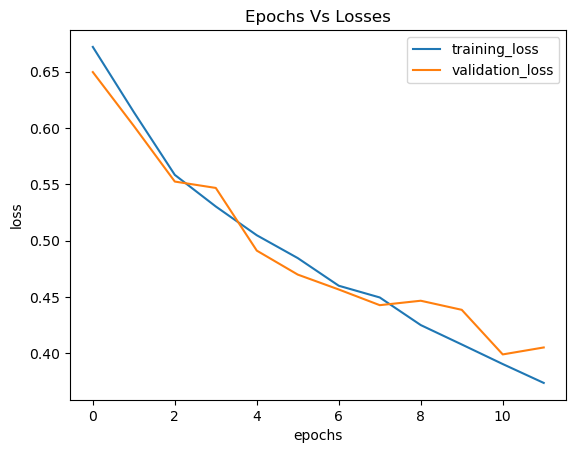

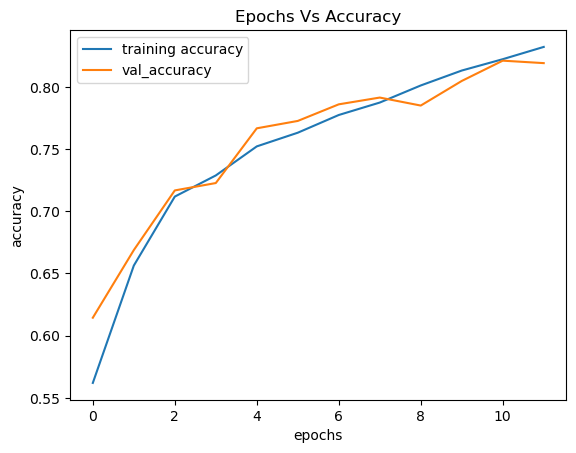

In [12]:
loss= training.history['loss']
accuracy= training.history['accuracy']
val_loss= training.history['val_loss']
val_accuracy= training.history['val_accuracy']
epoch = range(len(training.history['loss']))

plt.figure()
plt.plot(epoch,loss, label= 'training_loss')
plt.plot(epoch, val_loss, label= 'validation_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Epochs Vs Losses')
plt.legend();
plt.figure()
plt.plot(epoch,accuracy, label='training accuracy' )
plt.plot(epoch,val_accuracy,label= 'val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Epochs Vs Accuracy')
plt.legend();


## Predicting image

In [13]:
!wget https://www.collinsdictionary.com/images/full/dog_230497594.jpg
img_=tf.io.read_file('dog_230497594.jpg')
pred_img= tf.image.decode_image(img_)
pred_img= tf.image.resize(pred_img,size= (224,224))
imag = pred_img/255.

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
--2023-02-21 15:09:21--  https://www.collinsdictionary.com/images/full/dog_230497594.jpg
Resolving www.collinsdictionary.com (www.collinsdictionary.com)... 104.20.191.42, 172.67.19.203, 104.20.190.42, ...
Connecting to www.collinsdictionary.com (www.collinsdictionary.com)|104.20.191.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 448460 (438K) [image/jpeg]
Saving to: ‘dog_230497594.jpg’

dog_230497594.jpg   100%[===================>] 437.95K  --.-KB/s    in 0.04s   

2023-02-21 15:09:21 (11.2 MB/s) - ‘dog_230497594.jpg’ saved [448460/448460]



1/1 [==============================] - 0s 295ms/step


(-0.5, 223.5, 223.5, -0.5)

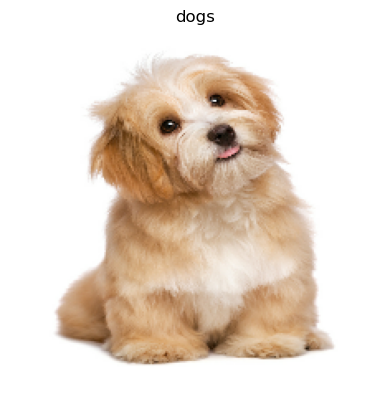

In [14]:
prediction= model.predict(tf.expand_dims(imag,axis=0))
prediction_class = classes[int(tf.round(prediction))]
plt.imshow(imag)
plt.title(prediction_class)
plt.axis(False)